Figure 5: Barotropic Stream Function - CNTRL, Anom and Time-series

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw


Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/v45/pas561/mom/archive/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

0.11.0


In [4]:
#load gmoc in rho space
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

vgrid_file ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean2 = nc.variables['yt_ocean'][:]
yu_ocean2 = nc.variables['yu_ocean'][:]
xt_ocean2 = nc.variables['xt_ocean'][:]
xu_ocean2 = nc.variables['xu_ocean'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape

In [5]:
hgrid_file ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t2 = nc.variables['geolon_t'][:]
geolat_t2 = nc.variables['geolat_t'][:]
nc.close() # close the file

In [6]:
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/'

Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.tx_trans.shape)

#store annual mean gmoc (instead of seasonal)
psi_ann=np.zeros((cntrl.tx_trans.shape[0],cntrl.tx_trans.shape[2],cntrl.tx_trans.shape[3]))
print(psi_ann.shape)

for t in range(psi_ann.shape[0]):
    print(t)
    psi_ann[t,:,:]=cntrl.tx_trans[t,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()

of=os.path.join(NYFCntrlDir,'psi_ann_141to155.npy')
a=np.save(of,psi_ann)

/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/ocean_*.nc
(15, 75, 1351, 3600)
(15, 1351, 3600)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

In [7]:
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/'

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(pert.tx_trans.shape)

#store annual mean gmoc (instead of seasonal)
psi_ann=np.zeros((pert.tx_trans.shape[0],pert.tx_trans.shape[2],pert.tx_trans.shape[3]))
print(psi_ann.shape)

for t in range(psi_ann.shape[0]):
    print(t)
    psi_ann[t,:,:]=pert.tx_trans[t,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()

of=os.path.join(NYFPertDir,'psi_ann_141to154.npy')
a=np.save(of,psi_ann)

/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/ocean_*.nc
(14, 75, 1351, 3600)
(14, 1351, 3600)
0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [8]:
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFPertDir2 = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

NYFCntrlDir2 = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann'

of=os.path.join(NYFCntrlDir,'psi_ann.npy')
tmp=np.load(of)
of=os.path.join(NYFCntrlDir2,'psi_ann_141to155.npy')
tmp2=np.load(of)
tmp2

cntrl_psi=numpy.concatenate((tmp,tmp2),axis=0)
print(cntrl_psi.shape)

of=os.path.join(NYFPertDir,'psi_ann.npy')
tmp=np.load(of)
of=os.path.join(NYFPertDir2,'psi_ann_141to154.npy')
tmp2=np.load(of)
tmp2

pert_psi=numpy.concatenate((tmp,tmp2),axis=0)
print(pert_psi.shape)

(44, 1351, 3600)
(43, 1351, 3600)


In [9]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'psi.npy')
np_cntrl_psi=np.load(of)
print(np_cntrl_psi.shape)

#load gmoc in rho space
of=os.path.join(NYFPertDir,'psi.npy')
np_pert_psi=np.load(of)
print(np_pert_psi.shape)

wp_os=3 #1971 to 1974


(49, 1080, 1440)
(44, 1080, 1440)


In [10]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFCntrlDir,'psi.npy')
nonp_cntrl_psi=np.load(of)
print(nonp_cntrl_psi.shape)

#load gmoc in rho space
of=os.path.join(NYFPertDir,'psi.npy')
nonp_pert_psi=np.load(of)
print(nonp_pert_psi.shape)

vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
yt_ocean = nc.variables['yt_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
nc.close() # close the file
#print potrho.shape
#print yt_ocean.shape

(50, 1080, 1440)
(44, 1080, 1440)


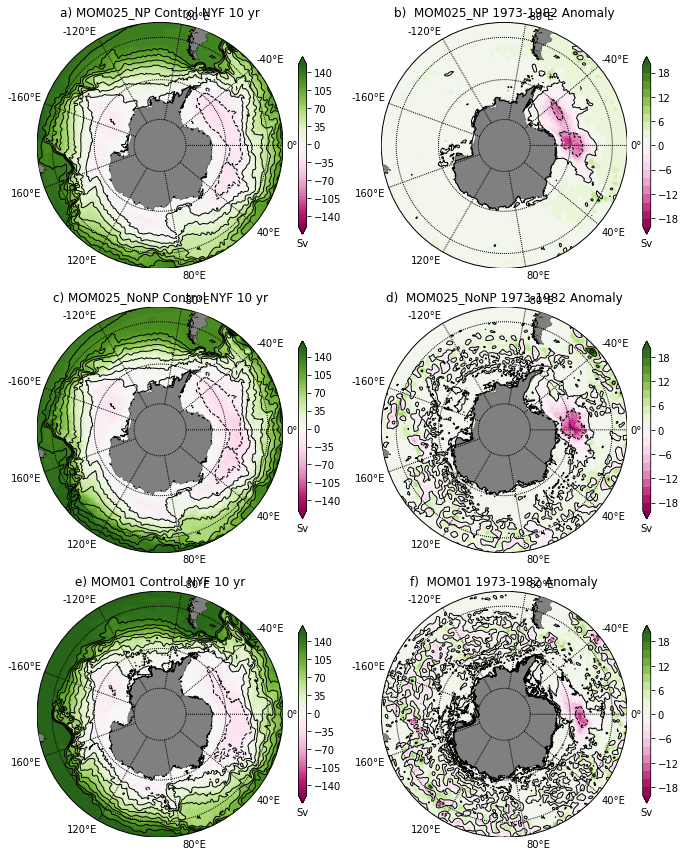

In [12]:
#plot psi
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('')


yrs=np.arange(1973,2016,1)

ii=0
clev = np.arange(-160,160,5)
#print clev
clev2 = np.arange(-160,160,20)
#print clev2

t1=0
t2=10
wp_os=3

plt.subplot(321)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(np_cntrl_psi[t1:t2],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,np.mean(np_cntrl_psi[t1:t2],axis=0),levels=clev2,colors='k',linewidths=1)
tit='a) MOM025_NP Control NYF 10 yr'
plt.title(tit)


plt.subplot(323)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,np.mean(nonp_cntrl_psi[t1:t2],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,np.mean(np_cntrl_psi[t1:t2],axis=0),levels=clev2,colors='k',linewidths=1)
tit='c) MOM025_NoNP Control NYF 10 yr'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

plt.subplot(325)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
p1=map.contourf(X,Y,np.mean(cntrl_psi[0:9],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,np.mean(cntrl_psi[0:9],axis=0),levels=clev2,colors='k',linewidths=1)
tit='e) MOM01 Control NYF 10 yr'
plt.title(tit)


clev = np.linspace(-20,20,21)
clev2 = np.linspace(-20,20,5)
var=np.mean(np_pert_psi[t1:t2,:,:],axis=0)-np.mean(np_cntrl_psi[t1+wp_os:t2+wp_os,:,:],axis=0)

plt.subplot(322)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,var, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,var,levels=clev2,colors='k',linewidths=1)
tit='b)  MOM025_NP 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

var=np.mean(nonp_pert_psi[t1:t2,:,:],axis=0)-np.mean(nonp_cntrl_psi[t1+wp_os:t2+wp_os,:,:],axis=0)

plt.subplot(324)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,var, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,var,levels=clev2,colors='k',linewidths=1)
tit='d)  MOM025_NoNP 1973-1982 Anomaly'
plt.title(tit)

var=np.mean(pert_psi[t1:t2,:,:],axis=0)-np.mean(cntrl_psi[t1+wp_os:t2+wp_os,:,:],axis=0)

plt.subplot(326)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
p1=map.contourf(X,Y,var, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
map.contour(X,Y,var,levels=clev2,colors='k',linewidths=1)
tit='f)  MOM01 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_psi.png'
plt.savefig(of,dpi=220)

44
(600, 2109, 2129, (44, 1351, 3600))


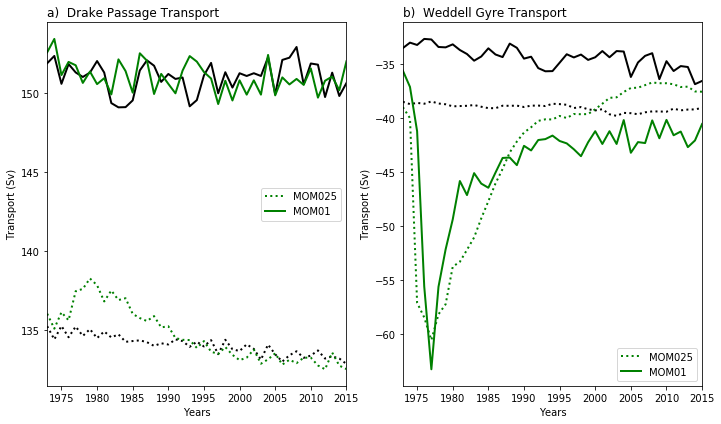

In [14]:
#plot time series of transports (with GM ... only 9 yrs for CNTRL) so using cntrl mean
#T=np.arange(50)
#print(T.shape)

ts=np_pert_psi.shape
ts=ts[0]
print(ts)

yrs=np.arange(1973,2017,1)

# do ACC psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=np.asscalar(i1[-1])
i2=np.asscalar(i2[-1])

j1=np.argwhere(yt_ocean<-54)
j1=np.asscalar(j1[-1])

cntrl_dp = np_cntrl_psi[:,0:j1,i1:i2]
cntrl_dp_bar = np.mean(cntrl_dp,2)
np_cntrl_dp_ts = np.max(cntrl_dp_bar,1)

pert_dp = np_pert_psi[:,0:j1,i1:i2]
pert_dp_bar = np.mean(pert_dp,2)
np_pert_dp_ts = np.max(pert_dp_bar,1)

#cntrl_dp = nonp_cntrl_psi[:,0:j1,i1:i2]
#cntrl_dp_bar = np.mean(cntrl_dp,2)
#nonp_cntrl_dp_ts = np.max(cntrl_dp_bar,1)

#pert_dp = nonp_pert_psi[:,0:j1,i1:i2]
#pert_dp_bar = np.mean(pert_dp,2)
#nonp_pert_dp_ts = np.max(pert_dp_bar,1)

#do mom01
i1=np.argwhere(xt_ocean2<-69)
i2=np.argwhere(xt_ocean2<-67)
i1=np.asscalar(i1[-1])
i2=np.asscalar(i2[-1])

j1=np.argwhere(yt_ocean2<-54)
j1=np.asscalar(j1[-1])

print(j1,i1,i2,cntrl_psi.shape)
cntrl_dp = cntrl_psi[:,0:j1,i1:i2]
cntrl_dp_bar = np.mean(cntrl_dp,2)
cntrl_dp_ts = np.max(cntrl_dp_bar,1)

pert_dp = pert_psi[:,0:j1,i1:i2]
pert_dp_bar = np.mean(pert_dp,2)
pert_dp_ts = np.max(pert_dp_bar,1)

# do Weddell Gyre psi min between lon 67-69S
i1=np.argwhere(xt_ocean<-60)
i2=np.argwhere(xt_ocean<15)
i1=np.asscalar(i1[-1])
i2=np.asscalar(i2[-1])

j1=np.argwhere(yt_ocean<-62)
j1=np.asscalar(j1[-1])

cntrl_wg = np_cntrl_psi[:,0:j1,i1:i2]
#cntrl_wg_bar = np.mean(cntrl_wg,2)
np_cntrl_wg_ts = np.min(np.min(cntrl_wg,2),1)

pert_wg = np_pert_psi[:,0:j1,i1:i2]
#pert_wg_bar = np.mean(pert_wg,2)
np_pert_wg_ts = np.min(np.min(pert_wg,2),1)

#cntrl_wg = nonp_cntrl_psi[:,0:j1,i1:i2]
#cntrl_wg_bar = np.mean(cntrl_wg,2)
#nonp_cntrl_wg_ts = np.min(np.min(cntrl_wg,2),1)

#pert_wg = nonp_pert_psi[:,0:j1,i1:i2]
#pert_wg_bar = np.mean(pert_wg,2)
#nonp_pert_wg_ts = np.min(np.min(pert_wg,2),1)

#do mom01
i1=np.argwhere(xt_ocean2<-60)
i2=np.argwhere(xt_ocean2<15)
i1=np.asscalar(i1[-1])
i2=np.asscalar(i2[-1])

j1=np.argwhere(yt_ocean2<-62)
j1=np.asscalar(j1[-1])

cntrl_wg = cntrl_psi[:,0:j1,i1:i2]
#cntrl_wg_bar = np.mean(cntrl_wg,2)
cntrl_wg_ts = np.min(np.min(cntrl_wg,2),1)

pert_wg = pert_psi[:,0:j1,i1:i2]
#pert_wg_bar = np.mean(pert_wg,2)
pert_wg_ts = np.min(np.min(pert_wg,2),1)

plt.figure(figsize(10,6))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(121)
plt.plot(yrs[0:44],np_cntrl_dp_ts[0+wp_os:44+wp_os],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:44],np_pert_dp_ts[0:44],linestyle=':',color='g',label='MOM025',linewidth=2)
#plt.plot(yrs[0:44],nonp_cntrl_dp_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_pert_dp_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
plt.plot(yrs[0:43],cntrl_dp_ts[0:43],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:43],pert_dp_ts[0:43],linestyle='-',color='g',label='MOM01',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='a)  Drake Passage Transport'
plt.title(tit,loc='left')
plt.legend(fontsize=10,loc='center right')
plt.xlim(1973,2015) 

plt.subplot(122)
plt.plot(yrs[0:44],np_cntrl_wg_ts[0+wp_os:44+wp_os],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:44],np_pert_wg_ts[0:44],linestyle=':',color='g',label='MOM025',linewidth=2)
#plt.plot(yrs[0:44],nonp_cntrl_wg_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_pert_wg_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
plt.plot(yrs[0:43],cntrl_wg_ts[0:43],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:43],pert_wg_ts[0:43],linestyle='-',color='g',label='MOM01',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='b)  Weddell Gyre Transport'
plt.title(tit,loc='left')
plt.legend(fontsize=10)
plt.xlim(1973,2015) 

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_psi_ts.png'
plt.savefig(of,dpi=220)



In [18]:
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_cntrl_wg_ts',np_cntrl_wg_ts)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_pert_wg_ts',np_pert_wg_ts)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_cntrl_wg_ts',cntrl_wg_ts)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_pert_wg_ts',pert_wg_ts)

In [17]:
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_cntrl_dp_ts',np_cntrl_dp_ts)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom025_pert_dp_ts',np_pert_dp_ts)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_cntrl_dp_ts',cntrl_dp_ts)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/mom01_pert_dp_ts',pert_dp_ts)